# Introduction to Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides the basis for many practical applications such as signal processing, image processing, and data reduction.

For a given m x n matrix M, the SVD is written as:

M = UΣV*

Where:
- U is an m x m matrix, the columns of which are the eigenvectors of MM*
- Σ is an m x n diagonal matrix, the diagonal elements of which are the square roots of the eigenvalues of MM* or M*M
- V* (the conjugate transpose of V) is an n x n matrix, the columns of which are the eigenvectors of M*M

The diagonal elements of Σ are known as the singular values of M. The columns of U and the columns of V* are called the left-singular vectors and right-singular vectors of M, respectively.

SVD is used in a wide range of applications including compressing, denoising, and data reduction. Its ability to handle different types of data makes it a versatile tool in the field of data science. If you are further interested and want to know more about some applications (especially for dimensionality reduction) you can check the following Resources from Steve Brunton: http://databookuw.com/page-2/page-4/ (Youtube playlist https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv and his book here: http://databookuw.com/databook.pdf where Chapter 1 is about SVD).

In [1]:
using Pkg
# Pkg.generate("SVDandPCA")
Pkg.activate("SVDandPCA")
Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("Plots")

  Activating new project at `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik/Excercise/Exercise 11/SVDandPCA`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed MultivariateStats ─ v0.10.3
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik/Excercise/Exercise 11/SVDandPCA/Project.toml`
  [6f286f6a] + MultivariateStats v0.10.3
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Lectures/Vorlesung - Ingenieurwissenschaftliche Grundlagen 3 (Numerische Methoden)/auxme_numerik/Excercise/Exercise 11/SVDandPCA/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [7d9fca2a] + Arpack v0.5.4
  [49dc2e85] + Calculus v0.5.1
  [34da2185] + Compat v4.15.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.1

## Example of Singular Value Decomposition (SVD)

Let's consider a simple example where we have a 3x3 matrix A. We will perform SVD on this matrix and verify the results.

In [2]:
using LinearAlgebra

A = [1 2 3; 4 5 6; 7 8 9]

U, S, Vt = svd(A)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
3×3 Matrix{Float64}:
 -0.214837   0.887231   0.408248
 -0.520587   0.249644  -0.816497
 -0.826338  -0.387943   0.408248
singular values:
3-element Vector{Float64}:
 16.84810335261421
  1.0683695145547099
  3.334752865031432e-16
Vt factor:
3×3 Matrix{Float64}:
 -0.479671  -0.572368   -0.665064
 -0.776691  -0.0756865   0.625318
 -0.408248   0.816497   -0.408248

## Task

Now that we have the singular values (s), left-singular vectors (U), and right-singular vectors (VT), let's verify the SVD equation:

A = UΣV*

Here, Σ is a diagonal matrix created from the singular values, and V* is the transpose of VT.

In [6]:
# Create m x n Sigma matrix
Sigma = Diagonal(S)

3×3 Diagonal{Float64, Vector{Float64}}:
 16.8481   ⋅        ⋅ 
   ⋅      1.06837   ⋅ 
   ⋅       ⋅       3.33475e-16

In [5]:
# Reconstruct matrix
A_reconst = U * Diagonal(S) * Vt'
println("Reconstructed Matrix:")
A_reconst

Reconstructed Matrix:


3×3 Matrix{Float64}:
 1.0  2.0  3.0
 4.0  5.0  6.0
 7.0  8.0  9.0

# Introduction to Principal Component Analysis (PCA)

In [7]:
using MultivariateStats, RDatasets, Plots

# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = Matrix(iris[1:2:end, 1:4])'
Xtr_labels = Vector(iris[1:2:end, 5])

# split other half to testing set
Xte = Matrix(iris[2:2:end, 1:4])'
Xte_labels = Vector(iris[2:2:end, 5]);

In [9]:
iris

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [8]:
Xtr

4×75 adjoint(::Matrix{Float64}) with eltype Float64:
 5.1  4.7  5.0  4.6  4.4  5.4  4.8  5.8  …  6.3  6.0  6.7  5.8  6.7  6.3  6.2
 3.5  3.2  3.6  3.4  2.9  3.7  3.0  4.0     3.4  3.0  3.1  2.7  3.3  2.5  3.4
 1.4  1.3  1.4  1.4  1.4  1.5  1.4  1.2     5.6  4.8  5.6  5.1  5.7  5.0  5.4
 0.2  0.2  0.2  0.3  0.2  0.2  0.1  0.2     2.4  1.8  2.4  1.9  2.5  1.9  2.3

In [25]:
# train a PCA model, allowing up to 3 dimensions
M = fit(PCA, Xtr; maxoutdim=3)

PCA(indim = 4, outdim = 3, principalratio = 0.9957325846529407)

Pattern matrix (unstandardized loadings):
────────────────────────────────────
         PC1         PC2         PC3
────────────────────────────────────
1   0.70954    0.344711   -0.160106
2  -0.227592   0.29865     0.215417
3   1.77976   -0.0797511   0.0197705
4   0.764206  -0.0453779   0.166764
────────────────────────────────────

Importance of components:
─────────────────────────────────────────────────────────
                                PC1        PC2        PC3
─────────────────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.3068    0.216437   0.100239
Variance explained         0.927532  0.0466128  0.021588
Cumulative variance        0.927532  0.974145   0.995733
Proportion explained       0.931507  0.0468125  0.0216805
Cumulative proportion      0.931507  0.978319   1.0
─────────────────────────────────────────────────────────

In [26]:
# apply PCA model to testing set
Yte = predict(M, Xte)

3×75 Matrix{Float64}:
  2.72714    2.75491     2.32396   …  -1.92047   -1.74161   -1.37706
 -0.230916  -0.406149    0.646374      0.246554   0.127625  -0.280295
  0.253119   0.0271266  -0.230469     -0.180044  -0.123165  -0.314992

In [27]:
# reconstruct testing observations (approximately)
Xr = reconstruct(M, Yte)

4×75 Matrix{Float64}:
 4.86449  4.61087   5.40782   5.00775   …  6.79346  6.58825  6.46774  5.94384
 3.04262  3.08695   3.89061   3.39069      3.20785  3.13416  3.03873  2.94737
 1.46099  1.48132   1.68656   1.48668      5.91124  5.39197  5.25542  5.02469
 0.10362  0.229519  0.421233  0.221041     2.28224  1.99665  1.91243  1.91901

In [28]:
Xte

4×75 adjoint(::Matrix{Float64}) with eltype Float64:
 4.9  4.6  5.4  5.0  4.9  4.8  4.3  5.7  …  6.4  6.9  6.9  6.8  6.7  6.5  5.9
 3.0  3.1  3.9  3.4  3.1  3.4  3.0  4.4     3.1  3.1  3.1  3.2  3.0  3.0  3.0
 1.4  1.5  1.7  1.5  1.5  1.6  1.1  1.5     5.5  5.4  5.1  5.9  5.2  5.2  5.1
 0.2  0.2  0.4  0.2  0.1  0.2  0.1  0.4     1.8  2.1  2.3  2.3  2.3  2.0  1.8

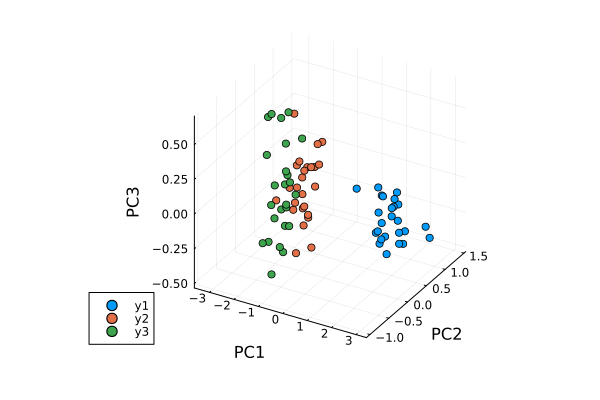

In [29]:
setosa = Yte[:, Xte_labels.=="setosa"]
versicolor = Yte[:, Xte_labels.=="versicolor"]
virginica = Yte[:, Xte_labels.=="virginica"]

p = scatter(setosa[1, :], setosa[2, :], setosa[3, :], marker=:circle, linewidth=0)
scatter!(versicolor[1, :], versicolor[2, :], versicolor[3, :], marker=:circle, linewidth=0)
scatter!(virginica[1, :], virginica[2, :], virginica[3, :], marker=:circle, linewidth=0)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3")

# setosa = Yte[:, Xte_labels.=="setosa"]
# versicolor = Yte[:, Xte_labels.=="versicolor"]
# virginica = Yte[:, Xte_labels.=="virginica"]

# p = scatter(setosa[1, :], setosa[2, :], marker=:circle, linewidth=0)
# scatter!(versicolor[1, :], versicolor[2, :], marker=:circle, linewidth=0)
# scatter!(virginica[1, :], virginica[2, :], marker=:circle, linewidth=0)
# plot!(p, xlabel="PC1", ylabel="PC2")